In [1]:
import pandas as pd
import datetime as dt
from pykrx import stock
from pykrx import bond
import matplotlib as plt
import seaborn as sns
import yfinance as yf

import warnings
warnings.filterwarnings(action='ignore')


#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = [12, 8] # [width, height] (inches)
plt.rc('font', family='Malgun Gothic')

sns.set()

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)



ModuleNotFoundError: ignored

In [ ]:
earning = pd.read_csv("./총기법종목선정수익률.csv")

In [ ]:
earning [ earning["재무비율방식"] == "레버리지기법" ]

,시작날짜,매도날짜,포트폴리오종목명,수익률,누적수익률,재무비율방식,연도
18,20050401,20060322,"['삼성전자', 'KT&G', '삼성SDI', '아모레G', '농심']",0.166422,1.166422,레버리지기법,2005
19,20060404,20070326,"['KT&G', 'NAVER', '아모레G', '롯데지주', '에스원']",0.016899,1.203031,레버리지기법,2006
20,20070404,20080324,"['KT&G', '현대미포조선', '롯데지주', '롯데칠성', '에스원']",0.198403,1.640118,레버리지기법,2007
21,20080321,20090311,"['NAVER', '현대미포조선', '아모레퍼시픽', '에스원', 'SBS']",-0.164384,1.206126,레버리지기법,2008
22,20090323,20100315,"['아모레퍼시픽', '유한양행', '엔씨소프트', '제일기획', '동서']",0.377132,2.038127,레버리지기법,2009
23,20100503,20110425,"['아모레퍼시픽', '엔씨소프트', '제일기획', '동서', '아모레G']",0.304392,2.962908,레버리지기법,2010
24,20110329,20120319,"['LG화학', '롯데정밀화학', '유한양행', '현대그린푸드', 'LF']",0.073992,3.256133,레버리지기법,2011
25,20120322,20130312,"['엔씨소프트', '롯데정밀화학', '현대그린푸드', '유한양행', '한섬']",-0.011284,3.208106,레버리지기법,2012
26,20130412,20140402,"['LG생활건강', '셀트리온', '아모레G', '현대그린푸드', '동서']",0.121236,3.718279,레버리지기법,2013
27,20140404,20150325,"['NAVER', 'KT&G', '아모레퍼시픽', '고려아연', '아모레G']",0.528365,6.211255,레버리지기법,2014


In [ ]:
test = stock.get_market_ohlcv("20140101", "20211231", "035420")

In [ ]:
test

,시가,고가,저가,종가,거래량
날짜,,,,,
2014-01-02,148007,148608,145004,145205,110009
2014-01-03,145203,145203,138996,139998,220469
2014-01-06,141199,142800,138395,139998,185826
2014-01-07,140398,141799,139997,140198,144233
2014-01-08,143000,145604,137393,140198,228388
...,...,...,...,...,...
2021-12-24,378000,388000,378000,384000,412695
2021-12-27,384500,384500,380000,380500,226757
2021-12-28,380000,385500,378000,384500,551228


In [ ]:
test.columns = ['open', 'high', 'low', 'close', 'volume']

In [ ]:
# ! pip install Analyzer

In [ ]:
from datetime import datetime, timedelta
import backtrader as bt
from backtrader import cerebro
from pandas.io.formats import style
import pandas as pd

class SmaCross200(bt.Strategy):
  
    def __init__(self):
        self.dataclose = self.datas[0].close # 종가
        self.SMA = bt.indicators.MovingAverageSimple(period=200) # 200일 이동평균선
        self.crossover = bt.ind.CrossOver(self.dataclose, self.SMA) # crossover signal              
    def next(self):
        if not self.position: # not in the market
            if self.crossover > 0: # if fast crosses slow to the upside
                close = self.data.close[0] # 종가 값
                size = int(self.broker.getcash() / close) # 최대 구매 가능 개수
                self.buy(size=size) # 매수 size = 구매 개수 설정
                  
        elif self.crossover < 0: # in the market & cross to the downside
            self.close() # 매도
                  
cerebro = bt.Cerebro()
test = stock.get_market_ohlcv("20200101", "20211231", "035420")
test.columns = ['open', 'high', 'low', 'close', 'volume']
data = bt.feeds.PandasData(dataname=test)
cerebro.adddata(data)
cerebro.broker.setcash(10000000) # 초기 자본 설정
cerebro.broker.setcommission(commission=0.00015) # 매매 수수료는 0.015% 설정
cerebro.addstrategy(SmaCross200) # 자신만의 매매 전략 추가
cerebro.run() # 백테스팅 시작


#Get final portfolio Value 
portvalue = cerebro.broker.getvalue() 
pnl = portvalue - 10000000 #Print out the final result 
print('Final Portfolio Value: {}원'.format(portvalue)) 
print('P/L: {}원'.format(pnl)) 
print((portvalue-10000000)/10000000,'%') #Visualize cerebro.plot()



Final Portfolio Value: 9294901.5원
P/L: -705098.5원
-0.07050985 %


<IPython.core.display.Javascript object>


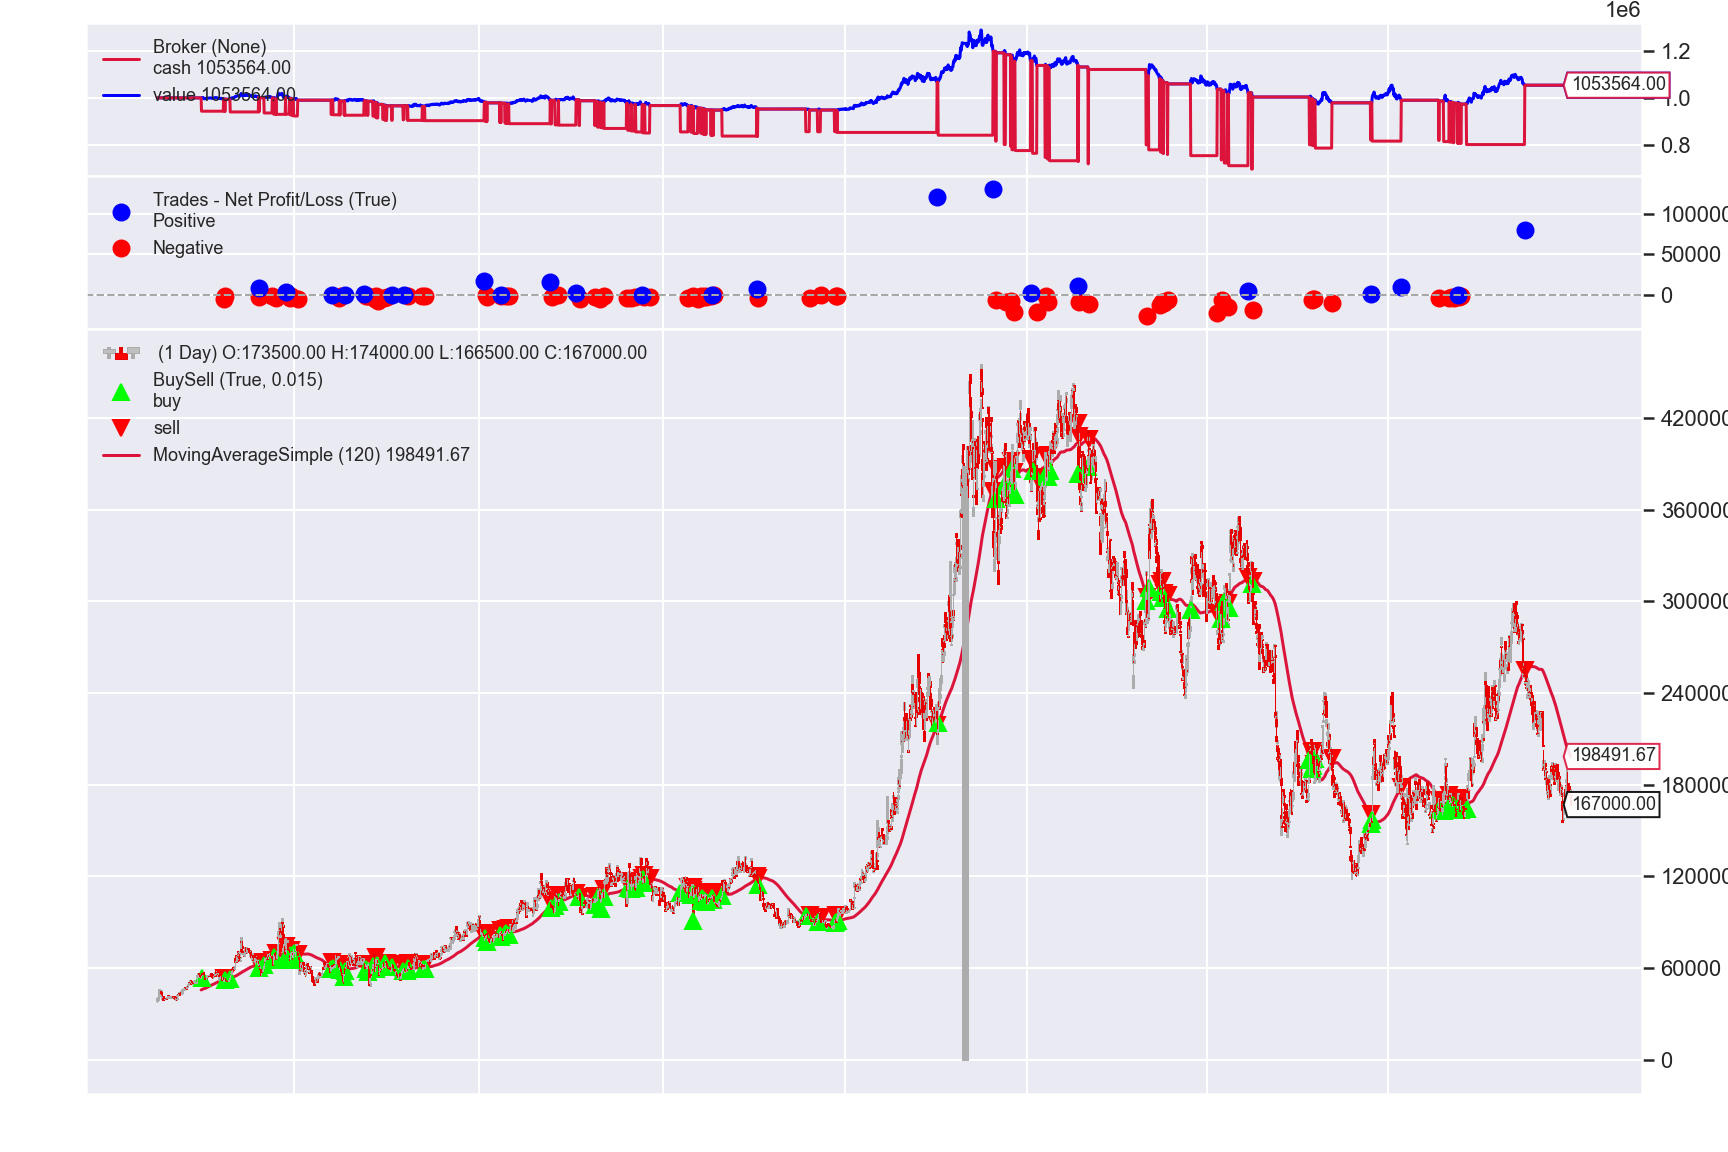

Final Portfolio Value: 1053564.0원
P/L: 53564.0원
0.053564 %


In [ ]:
from datetime import datetime, timedelta
import backtrader as bt
import pandas as pd
from backtrader import cerebro
from pandas.io.formats import style
from backtesting import Backtest, Strategy
from backtesting.lib import crossover


class MyStrategy(bt.Strategy):
    def __init__(self):
        self.dataclose = self.data.close
        self.sma = bt.indicators.MovingAverageSimple(period=120)

    def next(self):
        if not self.position:
            if self.sma < self.data.close:
                self.order = self.buy()
        else:
            if self.sma > self.data.close:
                self.order = self.sell()
                
df = stock.get_market_ohlcv("20200101", "20211231", "090430")
df.columns = ['open', 'high', 'low', 'close', 'volume']

data = bt.feeds.PandasData(dataname=df) # Pandas Dataframe 입력
cerebro = bt.Cerebro() 
cerebro.adddata(data)
cerebro.addstrategy(MyStrategy)
cerebro.broker.setcash(1000000) # 초기 투자 자금 : 백만원

cerebro.run() # Cerebro 클래스로 백테스트 실행
cerebro.plot(style='candle') # 백테스트 결과 차트 출력


             
##################################
portvalue = cerebro.broker.getvalue() 
pnl = portvalue - 1000000 #Print out the final result 
print('Final Portfolio Value: {}원'.format(portvalue)) 
print('P/L: {}원'.format(pnl)) 
print((portvalue-1000000)/1000000,'%') #Visualize cerebro.plot()

figure = cerebro.plot(volume=False, width=25, height=25)[0][0]
figure.savefig('example_sma.png')


In [ ]:
bt?

In [ ]:
class SmaCross120(bt.Strategy):
                 
    def __init__(self):
        self.dataclose = self.datas[0].close # 종가
        self.SMA = bt.indicators.MovingAverageSimple(period=120) # 200일 이동평균선
        self.crossover = bt.ind.CrossOver(self.dataclose, self.SMA) # crossover signal              
    def next(self):
        if not self.position: # not in the market
            if self.crossover > 0: # if fast crosses slow to the upside
                close = self.data.close[0] # 종가 값
                size = int(self.broker.getcash() / close) # 최대 구매 가능 개수
                self.buy(size=size) # 매수 size = 구매 개수 설정
                  
        elif self.crossover < 0: # in the market & cross to the downside
            self.close() # 매도
                  
cerebro = bt.Cerebro()
                  
data = bt.feeds.PandasData(dataname=test)
cerebro.adddata(data)
cerebro.broker.setcash(10000000) # 초기 자본 설정
cerebro.broker.setcommission(commission=0.00015) # 매매 수수료는 0.015% 설정
cerebro.addstrategy(SmaCross120) # 자신만의 매매 전략 추가
cerebro.run() # 백테스팅 시작


#Get final portfolio Value 
portvalue = cerebro.broker.getvalue() 
pnl = portvalue - 10000000 #Print out the final result 
print('Final Portfolio Value: {}원'.format(portvalue)) 
print('P/L: {}원'.format(pnl)) 
print((portvalue-10000000)/10000000,'%') #Visualize cerebro.plot()



Final Portfolio Value: 10000000.0원
P/L: 0.0원
0.0 %


In [ ]:
dd

NameError: name 'dd' is not defined

In [ ]:
#종목코드 형식 추가 
from datetime import datetime 
import backtrader as bt

#종목 코드 리스트
stockcodes = ['005930', '000660', '005380', '015760', '012330', '028260', '005490', '032830', 
              '055550', '017670', '090430', '105560', '051910', '034730', '000270', '033780', 
              '096770', '011170', '051900', '000810', '034220', '018260', '003550', '002790', 
              '010950', '086790', '010130', '066570', '004020', '035250']

#반복문 형식으로 실행하고 결과를 리스트에 저장 

fromdate1 = ["20140101"]
todate1 = ["20191231"]
pv = [] 

for i in range(len(stockcodes)): 
    cerebro = bt.Cerebro() 
    dataname1 = stockcodes[i]
    
    codes = stock.get_market_ohlcv(""+fromdate1+"", ""+todate1+"", ""+dataname1+"")
    codes = codes.reset_index()
    codes.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
    codes = codes.set_index('Date')
    data = bt.feeds.PandasData(dataname=codes)
    
    cerebro.adddata(data) 
    cerebro.broker.setcash(10000000) # 초기 자본 설정 
    cerebro.broker.setcommission(commission=0.00015) # 매매 수수료는 0.015% 설정 
    cerebro.addstrategy(SmaCross1) # 자신만의 매매 전략 추가 
    cerebro.run() # 백테스팅 시작 
    
    #Get final portfolio Value 
    portvalue = cerebro.broker.getvalue() 
    pnl = portvalue - 10000000 
    #Print out the final result 
    print('stock : ',stockcodes[i]) 
    print('Final Portfolio Value: {}'.format(portvalue)) 
    pv.append(portvalue)

In [ ]:
datetime?

In [ ]:
ㅇㅇ

In [ ]:
class SmaCross1(bt.Strategy):
    params = dict( pfast=50, # period for the fast moving average
                   pslow=200 # period for the slow moving average
                 )
    def __init__(self):
        sma1 = bt.ind.SMA(period=self.p.pfast) # fast moving average
        sma2 = bt.ind.SMA(period=self.p.pslow) # slow moving average
        self.crossover = bt.ind.CrossOver(sma1, sma2) # crossover signal              
    def next(self):
        if not self.position: # not in the market
            if self.crossover > 0: # if fast crosses slow to the upside
                close = self.data.close[0] # 종가 값
                size = int(self.broker.getcash() / close) # 최대 구매 가능 개수
                self.buy(size=size) # 매수 size = 구매 개수 설정
                  
        elif self.crossover < 0: # in the market & cross to the downside
            self.close() # 매도
                  
cerebro = bt.Cerebro()
                  
data = bt.feeds.PandasData(dataname=test)
cerebro.adddata(data)
cerebro.broker.setcash(10000000) # 초기 자본 설정
cerebro.broker.setcommission(commission=0.00015) # 매매 수수료는 0.015% 설정
cerebro.addstrategy(SmaCross1) # 자신만의 매매 전략 추가
cerebro.run() # 백테스팅 시작

#Get final portfolio Value 
portvalue = cerebro.broker.getvalue() 
pnl = portvalue - 10000000 #Print out the final result 
print('Final Portfolio Value: ${}'.format(portvalue)) 
print('P/L: ${}'.format(pnl)) 
print((portvalue-10000000)/10000000*100,'%') #Visualize cerebro.plot()

In [ ]:
earning = pd.read_csv("./총기법종목선정수익률.csv")

In [ ]:
earning [ earning["재무비율방식"] == "시장가치기법" ] 

In [ ]:
naver = stock.get_market_ohlcv("20120101", "20211231", "035420")
naver

In [ ]:
naver['SMA30']= naver['종가'].rolling(window=30).mean()
naver['SMA90']= naver['종가'].rolling(window=90).mean()
naver['SMA150']= naver['종가'].rolling(window=150).mean()
naver['SMA200']= naver['종가'].rolling(window=200).mean()

In [ ]:
naver.info()

In [ ]:
# 널값 제거
naver = naver[naver['SMA30'].isna()==False]
naver = naver[naver['SMA90'].isna()==False]
naver = naver[naver['SMA150'].isna()==False]
naver = naver[naver['SMA200'].isna()==False]

In [ ]:
naver

In [ ]:
naver.columns = ['open', 'high', 'low', 'close', 'volume', 'SMA30', 'SMA90', 'SMA150', 'SMA200']

In [ ]:
# ! pip install cufflinks
# ! pip install chart_studio

In [ ]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [ ]:
def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
  init_notebook_mode(connected=False)

In [ ]:
import chart_studio.plotly as py
import plotly

import cufflinks as cf
cf.set_config_file(offline=True)

from pandas_datareader import data as pdr
import yfinance as yf
import cufflinks as cf
import cufflinks as cf
configure_plotly_browser_state()
enable_plotly_in_cell()
# yf.pdr_override()
# dfcp = pdr.get_data_yahoo('005930.KS', '2018-01-01', '2019-12-31')

# QuantFig 매소드를 사용해서 그래프 그리기 -
# 내부적으로 컬럼 이름을  column=self._d['close'] , _d['volume']로 찾는다.
qf=cf.QuantFig(naver, title='Naver', legend='top', name='naver')
qf.add_bollinger_bands()
qf.add_volume()
qf.add_macd()
qf.iplot()

In [ ]:
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime

from pandas_datareader import data as pdr
import yfinance as yf

fig = go.Figure(
    data = [
        go.Scatter(x=naver.index, y=naver['close'], name='Naver'),
        go.Scatter(x=naver.index, y=naver['SMA30'], name='3일'),
        go.Scatter(x=naver.index, y=naver['SMA90'], name='90일'),
        go.Scatter(x=naver.index, y=naver['SMA150'], name='150일') ,
        go.Scatter(x=naver.index, y=naver['SMA200'], name='200일') 
    ]
)


fig.show()

In [ ]:
naver_testing = naver[['open', 'high', 'low', 'close', 'volume']].copy()
naver_testing.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

In [ ]:
naver_testing

In [ ]:
! pip install yfinance

In [ ]:
! pip install nodejs
! jupyter labextension install @jupyter-widgets/jupyterlab-manager
! jupyter labextension install jupyter-matplotlib

In [ ]:
from datetime import datetime
import backtrader as bt
from backtrader import plot
import yfinance as yf
# Create a subclass of Strategy to define the indicators and logic

class SmaCross(bt.Strategy):
    # list of parameters which are configurable for the strategy
    params = dict(
        pfast=50,  # period for the fast moving average
        pslow=200   # period for the slow moving average
    )

    def __init__(self):
        sma1 = bt.ind.SMA(period=self.p.pfast)  # fast moving average
        sma2 = bt.ind.SMA(period=self.p.pslow)  # slow moving average
        self.crossover = bt.ind.CrossOver(sma1, sma2)  # crossover signal

    def next(self):
        if not self.position:  # not in the market
            if self.crossover > 0:  # if fast crosses slow to the upside
                self.buy()  # enter long

        elif self.crossover < 0:  # in the market & cross to the downside
            self.close()  # close long position


cerebro = bt.Cerebro()  # create a "Cerebro" engine instance
cerebro.broker.setcash(100000)
# Create a data feed
data = bt.feeds.PandasData(dataname=yf.download('TSLA', '2019-01-01', '2021-07-06'))

cerebro.adddata(data)  # Add the data feed

cerebro.addstrategy(SmaCross)  # Add the trading strategy
cerebro.run()  # run it all
cerebro.plot()  # and plot it with a single command


In [ ]:
%matplotlib inline

from datetime import datetime
import backtrader as bt
import yfinance as yf

class SmaCross(bt.Strategy): # bt.Strategy를 상속한 class로 생성해야 함.
    params = dict(
        pfast=5, # period for the fast moving average
        pslow=30 # period for the slow moving average
    )
    
    def __init__(self):
        sma1 = bt.ind.SMA(period=self.p.pfast) # fast moving average
        sma2 = bt.ind.SMA(period=self.p.pslow) # slow moving average
        self.crossover = bt.ind.CrossOver(sma1, sma2) # crossover signal

    def next(self):
        if not self.position: # not in the market
            if self.crossover > 0: # if fast crosses slow to the upside
                close = self.data.close[0] # 종가 값
                size = int(self.broker.getcash() / close) # 최대 구매 가능 개수
                self.buy(size=size) # 매수 size = 구매 개수 설정
            elif self.crossover < 0: # in the market & cross to the downside
                self.close() # 매도
                


data = bt.feeds.PandasData(dataname=yf.download('TSLA', '2018-01-01', '2019-01-01'))


cerebro = bt.Cerebro()
cerebro.adddata(data)
cerebro.broker.setcash(1000000) # 초기 자본 설정
cerebro.broker.setcommission(commission=0.00015) # 매매 수수료는 0.015% 설정
cerebro.addstrategy(SmaCross) # 자신만의 매매 전략 추가


cerebro.run() # 백테스팅 시작
cerebro.plot() # 그래프로 보여주기

In [ ]:
# Github example

from datetime import datetime
import backtrader as bt
import yfinance as yf

class SmaCross(bt.SignalStrategy):
    def __init__(self):
        sma1, sma2 = bt.ind.SMA(period=90), bt.ind.SMA(period=200)
        crossover = bt.ind.CrossOver(sma1, sma2)
        self.signal_add(bt.SIGNAL_LONG, crossover)

cerebro = bt.Cerebro()
cerebro.addstrategy(SmaCross)

data = bt.feeds.PandasData(dataname=yf.download('TSLA', auto_adjust=True))



cerebro.adddata(data)

cerebro.run()

#Get final portfolio Value 
portvalue = cerebro.broker.getvalue() 
pnl = portvalue - 10000000 
#Print out the final result 
print('Final Portfolio Value: ${}'.format(portvalue)) 
print('P/L: ${}'.format(pnl)) 
print((portvalue-10000000)/10000000*100,'%')



In [ ]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover

from backtesting.test import SMA, GOOG


class SmaCross(Strategy):
    def init(self):
        price = self.data.Close
        self.ma5 = self.I(SMA, price, 30)
        self.ma20 = self.I(SMA, price, 90)
        self.ma60 = self.I(SMA, price, 150)
        self.ma120 = self.I(SMA, price, 200)

    def next(self):
        if crossover(self.ma5, self.ma20):
            self.buy()
        elif crossover(self.ma20, self.ma5):
            self.sell()


bt = Backtest(naver_testing, SmaCross, commission=.002,
              exclusive_orders=True)
stats = bt.run()
bt.plot()

In [ ]:
import backtrader as bt

"""
다음과 같은 에러 발생
        ImportError: cannot import name 'warnings' from 'matplotlib.dates' (C:\AI\pythonProject\venv\lib\site-packages\matplotlib\dates.py)
해결책  : 현재  matplotlib 3.5.1  --> 3.2.2로 버전 다운
        pip install -U matplotlib==3.2.2 
"""


# 볼린저밴드 : 20일 이동평균선을 기준으로 주가가 어느 위치에 있는지 알려주는 지표
# 상단선: 20일 이동평균선 + 2 * 표준편차
# 하단선: 20일 이동평균선 - 2 * 표준편차

class SmaCross(bt.Strategy): # bt.Strategy를 상속한 class로 생성해야 함.
    params = ( ("period", 20), ("devfactor", 2), ("debug", False) )

    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.data.datetime[0]
        if isinstance(dt, float):
                dt = bt.num2date(dt)
                print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        self.boll = bt.indicators.BollingerBands(period=self.p.period, devfactor=self.p.devfactor, plot=True)

    # https://jsp-dev.tistory.com/entry/PythonBacktrader-%EB%8B%A4%EC%A4%91-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%B0%B1%ED%85%8C%EC%8A%A4%ED%8C%85-Python-sqlite3backtrader-Mutliple-Data-Feeds-Pandas-DataFrame-to-Backtrader
    def next(self):
        global size
        if not self.position: # not in the market
            if self.data.low[0] < self.boll.lines.bot[0]:
                bottom = self.boll.lines.bot[0]
                size = int(self.broker.getcash() / bottom)
                # 최대 구매 가능 개수
                self.buy(price=bottom, size=size)
                # 매수 size = 구매 개수 설정
                self.log('BUY CREATE, %.2f' % (bottom))
                print(size, 'EA')
        else:
            if self.data.high[0] > self.boll.lines.mid[0]:
                self.sell(price=self.boll.lines.mid[0],size=size)
                # 매도
                self.log('SELL CREATE, %.2f' % (self.boll.lines.mid[0]))
                print(size, 'EA')
#--------------------------------------------------------------------

size=0
ticker =  "035420"
# 전체 종목코드와 종목명 가져오기
# df = df.rename(columns={'시가':'open', '고가':'high', '저가':'low', '종가':'close', '거래량':'volume'})
# df["open"]=df["open"].apply(pd.to_numeric,errors="coerce")

from pykrx import stock
df = stock.get_market_ohlcv("20120101", "20211231", ticker)
df.columns = ["open","high","low","close","volume"]

data = bt.feeds.PandasData(dataname=df)
cerebro = bt.Cerebro()

cerebro.broker.setcash(1000000)             #------------------- 투자금액 설정
cerebro.broker.setcommission(0.00015)       #------------------- 0.015% 수수료

for idx, ticker in enumerate(['035420','035420']):
    cerebro.adddata(data, name=ticker)                       #------------------- Add the data feed


cerebro.addstrategy(SmaCross)               #------------------- Add the trading strategy
cerebro.run()                               #------------------- run it all

cerebro.plot(style='candlestick',barup='red',bardown='blue',xtight=True,ytight=True, grid=True)


In [ ]:
import backtrader as bt
from datetime import datetime

class SmaCross(bt.Strategy): # bt.Strategy를 상속한 class로 생성해야 함.
    params = dict(
        pfast = 90, # period for the fast moving average
        pslow = 200 # period for the slow moving average
    )
    
    def __init__(self):

        sma1 = bt.ind.SMA(period=self.p.pfast) # fast moving average
        sma2 = bt.ind.SMA(period=self.p.pslow) # slow moving average
        self.crossover = bt.ind.CrossOver(sma1, sma2) # crossover signal


    def next(self):

        if not self.position: # not in the market
            if self.crossover > 0: # if fast crosses slow to the upside
                close = self.data.close[0] # 종가 값
                size = int(self.broker.getcash() / close) # 최대 구매 가능 개수
                self.buy(size=size) # 매수 size = 구매 개수 설정
        elif self.crossover < 0: # in the market & cross to the downside
            self.close() # 매도

cerebro = bt.Cerebro() # create a "Cerebro" engine instance


data = bt.feeds.YahooFinanceData(dataname = '005930',
                                 fromdate = datetime(2012, 1, 1),
                                 todate = datetime(2021, 12, 31))




cerebro.adddata(data)
cerebro.broker.setcash(1000000) # 초기 자본 설정
cerebro.broker.setcommission(commission=0.00015) # 매매 수수료는 0.015% 설정
cerebro.addstrategy(SmaCross) # 자신만의 매매 전략 추가

cerebro.run() # 백테스팅 시작

cerebro.plot() # 그래프로 보여주기

In [ ]:
bt.feeds.YahooFinanceData?

In [ ]:
! pip uninstall matplotlib --yes

In [ ]:
!pip install backtrader


In [ ]:
naver.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

In [ ]:
naver

In [ ]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover

from backtesting.test import SMA, GOOG


class SmaCross(Strategy):
    def init(self):
        price = self.data.Close
        self.ma30 = self.I(SMA, price, 30)
        self.ma90 = self.I(SMA, price, 90)
        self.ma150 = self.I(SMA, price, 150)
        self.ma200 = self.I(SMA, price, 200)

    def next(self):
        if crossover(self.ma30, self.ma90):
            self.buy()
        elif crossover(self.ma150, self.ma200):
            self.sell()


bt = Backtest(naver, SmaCross, commission=.002,
              exclusive_orders=True)
stats = bt.run()
bt.plot()

In [ ]:
! pip install -U matplotlib==3.2.2 

In [ ]:
import backtrader as bt
from pykrx import stock
import pandas as pd


class SmaCross(bt.Strategy): # bt.Strategy를 상속한 class로 생성해야 함.
    params = ( ("period", 20), ("devfactor", 2), ("debug", False) )
    
    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.data.datetime[0]
        if isinstance(dt, float):
                dt = bt.num2date(dt)
                print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        self.boll = bt.indicators.BollingerBands(period=self.p.period, devfactor=self.p.devfactor, plot=True)

    # https://jsp-dev.tistory.com/entry/PythonBacktrader-%EB%8B%A4%EC%A4%91-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%B0%B1%ED%85%8C%EC%8A%A4%ED%8C%85-Python-sqlite3backtrader-Mutliple-Data-Feeds-Pandas-DataFrame-to-Backtrader
    def next(self):
        global size
        if not self.position: # not in the market
            if self.data.low[0] < self.boll.lines.bot[0]:
                bottom = self.boll.lines.bot[0]
                size = int(self.broker.getcash() / bottom)
                # 최대 구매 가능 개수
                self.buy(price=bottom, size=size)
                # 매수 size = 구매 개수 설정
                self.log('BUY CREATE, %.2f' % (bottom))
                print(size, 'EA')
        else:
            if self.data.high[0] > self.boll.lines.mid[0]:
                self.sell(price=self.boll.lines.mid[0],size=size)
                # 매도
                self.log('SELL CREATE, %.2f' % (self.boll.lines.mid[0]))
                print(size, 'EA')
#--------------------------------------------------------------------

size=0
ticker =  "035420"
# 전체 종목코드와 종목명 가져오기
# df = df.rename(columns={'시가':'open', '고가':'high', '저가':'low', '종가':'close', '거래량':'volume'})
# df["open"]=df["open"].apply(pd.to_numeric,errors="coerce")

from pykrx import stock
df = stock.get_market_ohlcv("2014-01-01", "2021-12-30", ticker)
df.columns = ["open", "high", "low", "close", "volume"]

data = bt.feeds.PandasData(dataname=df) #데이터 넣어주기
cerebro = bt.Cerebro() #백테스팅 총괄자 class

cash=1000000
cerebro.broker.setcash(cash)             #------------------- 투자금액 설정
cerebro.broker.setcommission(0.00015)       #------------------- 0.015% 수수료

for idx, ticker in enumerate(['035420']): #for문으로 기업 데이터 input
    cerebro.adddata(data, name=ticker)                       #------------------- Add the data feed


cerebro.addstrategy(SmaCross)               #------------------- Add the trading strategy

start_value = cerebro.broker.getvalue()
cerebro.run()  # run it all
final_value = cerebro.broker.getvalue()

print('* start value : {} won'.format(start_value))
print('* final value : {} won'.format(final_value))
print('* earning rate : {}%'.format(round((final_value - start_value) / start_value * 100.0,3)))




In [ ]:
# 200일 이동평균선

import backtrader as bt
from pykrx import stock
import pandas as pd
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from backtesting.test import SMA, GOOG


class SmaCross(bt.Strategy): # bt.Strategy를 상속한 class로 생성해야 함.
    params = ( ("period", 20), ("devfactor", 2), ("debug", False) )
    
    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.data.datetime[0]
        if isinstance(dt, float):
                dt = bt.num2date(dt)
                print('%s, %s' % (dt.isoformat(), txt))


    def __init__(self):
        price = self.data.Close
        self.ma30 = self.I(SMA, price, 30)
        self.ma90 = self.I(SMA, price, 90)
        self.ma150 = self.I(SMA, price, 150)
        self.ma200 = self.I(SMA, price, 200)

    # https://jsp-dev.tistory.com/entry/PythonBacktrader-%EB%8B%A4%EC%A4%91-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%B0%B1%ED%85%8C%EC%8A%A4%ED%8C%85-Python-sqlite3backtrader-Mutliple-Data-Feeds-Pandas-DataFrame-to-Backtrader
    def next(self):
        if crossover(price, self.ma200):
            self.buy()
        elif crossover(self.ma200, price):
            self.sell()

    
    def next(self):
        global size
        if not self.position: # not in the market
            if self.data.low[0] < self.boll.lines.bot[0]:
                bottom = self.boll.lines.bot[0]
                size = int(self.broker.getcash() / bottom)
                # 최대 구매 가능 개수
                self.buy(price=bottom, size=size)
                # 매수 size = 구매 개수 설정
                self.log('BUY CREATE, %.2f' % (bottom))
                print(size, 'EA')
        else:
            if self.data.high[0] > self.boll.lines.mid[0]:
                self.sell(price=self.boll.lines.mid[0],size=size)
                # 매도
                self.log('SELL CREATE, %.2f' % (self.boll.lines.mid[0]))
                print(size, 'EA')
#--------------------------------------------------------------------

size=0
ticker =  "035420"
# 전체 종목코드와 종목명 가져오기
# df = df.rename(columns={'시가':'open', '고가':'high', '저가':'low', '종가':'close', '거래량':'volume'})
# df["open"]=df["open"].apply(pd.to_numeric,errors="coerce")

from pykrx import stock
df = stock.get_market_ohlcv("2014-01-01", "2021-12-30", ticker)
df.columns = ["open", "high", "low", "close", "volume"]

data = bt.feeds.PandasData(dataname=df) #데이터 넣어주기
cerebro = bt.Cerebro() #백테스팅 총괄자 class

cash=1000000
cerebro.broker.setcash(cash)             #------------------- 투자금액 설정
cerebro.broker.setcommission(0.00015)       #------------------- 0.015% 수수료

for idx, ticker in enumerate(['035420']): #for문으로 기업 데이터 input
    cerebro.adddata(data, name=ticker)                       #------------------- Add the data feed


cerebro.addstrategy(SmaCross)               #------------------- Add the trading strategy

start_value = cerebro.broker.getvalue()
cerebro.run()  # run it all
final_value = cerebro.broker.getvalue()

print('* start value : {} won'.format(start_value))
print('* final value : {} won'.format(final_value))
print('* earning rate : {}%'.format(round((final_value - start_value) / start_value * 100.0,3)))




In [ ]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from backtesting.test import SMA, GOOG


class SmaCross(Strategy):
    def init(self):
        price = self.data.Close
        self.ma30 = self.I(SMA, price, 30)
        self.ma90 = self.I(SMA, price, 90)
        self.ma150 = self.I(SMA, price, 150)
        self.ma200 = self.I(SMA, price, 200)

    def next(self):
        if crossover(self.ma30, self.ma90):
            self.buy()
        elif crossover(self.ma150, self.ma200):
            self.sell()


bt = Backtest(naver, SmaCross, commission=.002,
              exclusive_orders=True)
stats = bt.run()
bt.plot()

In [ ]:
# 200일 이동평균선

import backtrader as bt
from pykrx import stock
import pandas as pd
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from backtesting.test import SMA, GOOG

class SMA200(bt.Strategy):
    def log(self, txt, dt=None):
        dt = dt or self.datas[0].datetime.date(0)
        print('%S, %S' % (dt.isoformat(), txt))
        
    def __init__(self):
        price = self.data.close
        self.sma = bt.indicators.SimpleMovingAverage(self.datas[0], period=200)
        
    def notify_
